<a href="https://colab.research.google.com/github/jul1andav1d/Practice-and-Exercises/blob/main/Gradient_Boosting_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Gradient Boosting

![gradient boosting image](https://media.geeksforgeeks.org/wp-content/uploads/20200721214745/gradientboosting.PNG)

Image thanks to [Geeks for Geeks](https://www.geeksforgeeks.org/ml-gradient-boosting/)

In this assignment you will:
1. import and prepare a dataset for modeling
2. test and evaluate 3 different boosting models and compare the fit times of each.
3. tune the hyperparameters of the best model to reduce overfitting and improve performance.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, plot_confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In this assignment you will be working with census data.  Your goal is to predict whether a person will make more or less than $50k per year in income.

The data is available [here](https://drive.google.com/file/d/1drlRzq-lIY7rxQnvv_3fsxfIfLsjQ4A-/view?usp=sharing)

In [3]:
!pip install openpyxl==3.0.0

In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Data Science - Coding Dojo/DataSci Week 8 Ensemble Models/Copy of census_income - census_income.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Prepare your dataset for modeling.

Remember to: 
1. Check for missing data, bad data, and duplicates.
2. Check your target class balance.
3. Perform your validation split
4. Create a preprocessing pipeline to use with your models.
5. Fit and evaluate your models using pipelines

#Check for missing data, bad data, and duplicates.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   education       32561 non-null  object
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income-class    32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [6]:
df.isna().any().sum()

0

In [7]:
df.drop(columns=['Unnamed: 0'], inplace= True)

In [8]:
df.duplicated().sum()

3465

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

#Check your target class balance.

In [11]:
df['income-class'].value_counts()

<=50K    21886
>50K      7210
Name: income-class, dtype: int64

In [12]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,29096.000000,29096.000000,29096.000000,29096.000000
mean,39.251340,1197.802206,97.175179,40.637820
std,13.687157,7778.225220,424.008232,12.735418
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,38.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b4610a710>,
      dtype=object)

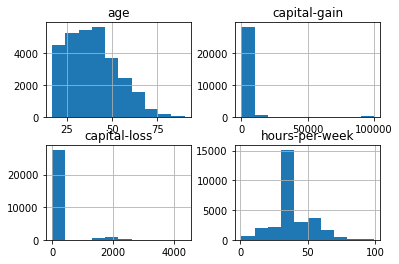

In [13]:
df.hist()

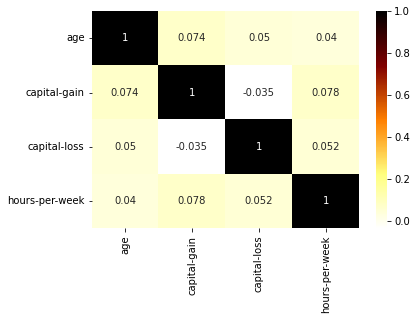

In [14]:
import seaborn as sns

corr = df.corr()

sns.heatmap(corr, annot=True, cmap='afmhot_r')

#Perform validation split

In [15]:
X = df.drop(columns='income-class')
y = df['income-class']

In [16]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#Create a preprocessing pipeline to use with your models.

In [17]:
cat_feat = make_column_selector(dtype_include='object')
num_feat = make_column_selector(dtype_include='number')

ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

col_trans = make_column_transformer((ohe, cat_feat), (scaler, num_feat))

#Fit and evaluate your models using pipelines

# - eXtreme Gradient Boosting
We are going to compare both metrics and fit times for our models.  Notice the 'cell magic' in the top of the cell below.  By putting `%%time` at the top of a notebook cell, we can tell it to output how long that cell took to run.  We can use this to compare the speed of each of our different models.  Fit times can be very important for models in deployment, especially with very large dataset and/or many features.

Instantiate an eXtreme Gradient Boosting Classifier (XGBClassifier) below, fit it, and print out a classification report.  Take note of the accuracy, recall, precision, and f1-score, as well as the run time of the cell to compare to our next models.

In [18]:
%%time
xgb = XGBClassifier()

xgbpipe = make_pipeline(col_trans, xgb)
xgbpipe.fit(X_train, y_train)

xgbtrainpred = xgbpipe.predict(X_train)
xgbtestpred = xgbpipe.predict(X_test)

print('Classification Metrics on Training Data')
print(classification_report(y_train, xgbtrainpred))
print('Classification Metrics on Testing Data')
print(classification_report(y_test, xgbtestpred))

Classification Metrics on Training Data
              precision    recall  f1-score   support

       <=50K       0.87      0.96      0.91     16405
        >50K       0.81      0.58      0.68      5417

    accuracy                           0.86     21822
   macro avg       0.84      0.77      0.79     21822
weighted avg       0.86      0.86      0.85     21822

Classification Metrics on Testing Data
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      5481
        >50K       0.80      0.55      0.65      1793

    accuracy                           0.86      7274
   macro avg       0.83      0.75      0.78      7274
weighted avg       0.85      0.86      0.85      7274

CPU times: user 2.76 s, sys: 59.3 ms, total: 2.82 s
Wall time: 2.83 s


# More Gradient Boosting

Now fit and evaluate a Light Gradient Boosting Machine and a the Scikit Learn (sklearn) gradient boost model.  Remember to use the `%%time` cell magic command to get the run time.

## LightGBM

In [19]:
%%time
lgbm = LGBMClassifier()

lgbmpipe = make_pipeline(col_trans, lgbm)
lgbmpipe.fit(X_train, y_train)

lgbmtrainpred = lgbmpipe.predict(X_train)
lgbmtestpred = lgbmpipe.predict(X_test)

print('Classification Metrics on Training Data')
print(classification_report(y_train, lgbmtrainpred))
print('Classification Metrics on Testing Data')
print(classification_report(y_test, lgbmtestpred))

Classification Metrics on Training Data
              precision    recall  f1-score   support

       <=50K       0.90      0.95      0.92     16405
        >50K       0.81      0.69      0.75      5417

    accuracy                           0.88     21822
   macro avg       0.86      0.82      0.83     21822
weighted avg       0.88      0.88      0.88     21822

Classification Metrics on Testing Data
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      5481
        >50K       0.78      0.65      0.70      1793

    accuracy                           0.87      7274
   macro avg       0.83      0.79      0.81      7274
weighted avg       0.86      0.87      0.86      7274

CPU times: user 1.95 s, sys: 27.7 ms, total: 1.98 s
Wall time: 1.99 s


## GradientBoostingClassifier

In [20]:
%%time
gbc = GradientBoostingClassifier()

gbcpipe = make_pipeline(col_trans, gbc)
gbcpipe.fit(X_train, y_train)

gbctrainpred = gbcpipe.predict(X_train)
gbctestpred = gbcpipe.predict(X_test)

print('Classification Metrics on Training Data')
print(classification_report(y_train, gbctrainpred))
print('Classification Metrics on Testing Data')
print(classification_report(y_test, gbctestpred))

Classification Metrics on Training Data
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     16405
        >50K       0.81      0.60      0.69      5417

    accuracy                           0.87     21822
   macro avg       0.85      0.78      0.80     21822
weighted avg       0.86      0.87      0.86     21822

Classification Metrics on Testing Data
              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91      5481
        >50K       0.79      0.57      0.66      1793

    accuracy                           0.86      7274
   macro avg       0.83      0.76      0.79      7274
weighted avg       0.85      0.86      0.85      7274

CPU times: user 5.54 s, sys: 77.1 ms, total: 5.62 s
Wall time: 6.59 s



# Tuning Gradient Boosting Models

Tree-based gradient boosting models have a LOT of hyperparameters to tune.  Here are the documentation pages for each of the 3 models you used today:

1. [XGBoost Hyperparameter Documentation](https://xgboost.readthedocs.io/en/latest/parameter.html)
2. [LightGBM Hyperparameter Documentation](https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html)
3. [Scikit-learn Gradient Boosting Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

Choose the model you felt performed the best when comparing multiple metrics and the runtime for fitting, and use GridSearchCV to try at least 2 different values each for 3 different hyper parameters in boosting model you chose.

See if you can create a model with an accuracy between 86 and 90.


# - Im choosing to work with the LightGBM:

In [21]:
lgbmpipe.get_params()

{'columntransformer': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore'),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b3d178910>),
                                 ('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b3d1785d0>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__onehotencoder': OneHotEncoder(handle_unknown='ignore'),
 'columntransformer__onehotencoder__categories': 'auto',
 'columntransformer__onehotencoder__drop': None,
 'columntransformer__onehotencoder__dtype': numpy.float64,
 'columntransformer__onehotencoder__handle_unknown': 'ignore',
 'columntransformer__onehotencoder__sparse': True,
 'columntransformer__remainder': 'drop',
 'columntransformer__sparse_threshold': 0.3,
 'columntransformer__standardscaler': StandardScaler(),
 'column

# - Trying a couple different values each, on 3 different hyper parameters:

In [22]:
lgbmparams = {'lgbmclassifier__max_depth': [-2, 4, 6, 9],
              'lgbmclassifier__n_estimators': [80, 140, 200],
              'lgbmclassifier__num_leaves': [15, 20, 28]}

- Instantiating GridSearchCV:

In [23]:
#It takes a little longer...

In [24]:
lgbmgs = GridSearchCV(lgbmpipe, lgbmparams)

lgbmgs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b3d178910>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b3d1785d0>)])),
                                       ('lgbmclassifier', LGBMClassifier())]),
             param_grid={'lgbmclassifier__max_depth': [-2, 4, 6, 9],
                         'lgbmclassifier__n_estimators': [80, 140, 200],
            

- Getting the best params:

In [25]:
lgbmgs.best_params_

{'lgbmclassifier__max_depth': 9,
 'lgbmclassifier__n_estimators': 140,
 'lgbmclassifier__num_leaves': 15}

# - Checking if I can create a model with an accuracy between 86 and 90

In [26]:
lgbm1 = LGBMClassifier(max_depth=9, n_estimators=140, num_leaves=15, random_state=42) 

In [27]:
lgbm1pipe = make_pipeline(col_trans, lgbm1)
lgbm1pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b3d178910>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b3d1785d0>)])),
                ('lgbmclassifier',
                 LGBMClassifier(max_depth=9, n_estimators=140, num_leaves=15,
                                random_state=42))])

In [28]:
lgbm1trainpred = lgbm1pipe.predict(X_train)
lgbm1testpred = lgbm1pipe.predict(X_test)

In [29]:
print('Score on Training Data') 
print(lgbm1pipe.score(X_train, lgbm1trainpred))
print('Score on Testing Data')
print(lgbm1pipe.score(X_test, lgbm1testpred))

Score on Training Data
1.0
Score on Testing Data
1.0


# Evaluation

Evaluate your model using a classifiation report and/or a confusion matrix.  Explain in text how your model performed in terms of precision, recall, and it's ability to predict each of the two classes.  Also talk about the benefits or drawbacks of the computation time of that model.

- Classification Report:

In [30]:
print('Classification Metrics on Training Data')
print(classification_report(y_train, lgbm1trainpred))
print('Classification Metrics on Testing Data')
print(classification_report(y_test, lgbm1testpred))

Classification Metrics on Training Data
              precision    recall  f1-score   support

       <=50K       0.90      0.95      0.92     16405
        >50K       0.80      0.67      0.73      5417

    accuracy                           0.88     21822
   macro avg       0.85      0.81      0.83     21822
weighted avg       0.87      0.88      0.87     21822

Classification Metrics on Testing Data
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      5481
        >50K       0.78      0.64      0.70      1793

    accuracy                           0.87      7274
   macro avg       0.83      0.79      0.81      7274
weighted avg       0.86      0.87      0.86      7274



- Confussion Matrix:

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print('CONFUSION MATRIX TRAIN DATA')
cmtrain = metrics.confusion_matrix(y_train.values, lgbm1trainpred)
print(cmtrain)

print('CONFUSION MATRIX TESTING DATA')
cmtest = metrics.confusion_matrix(y_test.values, lgbm1testpred)
print(cmtest);

CONFUSION MATRIX TRAIN DATA
[[15507   898]
 [ 1770  3647]]
CONFUSION MATRIX TESTING DATA
[[5151  330]
 [ 649 1144]]


# Conclusion

In this assignment you practiced:
1. data cleaning
2. instantiating, fitting, and evaluating boosting models using multiple metrics
3. timing how long it takes a model to fit and comparing run times between multiple models
4. and choosing a final model based on multiple metrics.

